In [1]:
import pandas as pd

dataset = pd.read_csv("C:/Users/yunit/Downloads/transaction.csv")
dataset

,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
0,537626,22725,830,12/7/2010 14:57,12347,Iceland
1,537626,22729,948,12/7/2010 14:57,12347,Iceland
2,537626,22195,695,12/7/2010 14:57,12347,Iceland
3,542237,22725,636,1/26/2011 14:30,12347,Iceland
4,542237,22729,536,1/26/2011 14:30,12347,Iceland
...,...,...,...,...,...,...
10541,543911,21700,455,2/14/2011 12:46,17829,United Arab Emirates
10542,543911,22111,578,2/14/2011 12:46,17829,United Arab Emirates
10543,543911,22112,163,2/14/2011 12:46,17829,United Arab Emirates
10544,564428,23296,545,8/25/2011 11:27,17844,Canada


In [2]:
country = dataset['Country'].value_counts()
country

Country
Germany                 2269
France                  2109
EIRE                    1620
Netherlands              634
Spain                    539
Belgium                  486
Switzerland              434
Portugal                 367
Australia                356
Norway                   239
Italy                    190
Channel Islands          184
Finland                  152
Cyprus                   113
Sweden                   109
Denmark                   98
Japan                     92
Austria                   88
Poland                    80
Israel                    61
USA                       47
Singapore                 45
Unspecified               44
Canada                    36
Iceland                   35
Greece                    33
United Arab Emirates      23
Malta                     15
RSA                       14
Brazil                     8
Lithuania                  8
Lebanon                    5
European Community         5
Czech Republic             4
Bahrai

In [3]:
transaksi = dataset.groupby('Country')['InvoiceNo'].nunique()

df_transaksi = transaksi.reset_index()

df_transaksi.columns = ['Country', 'Transaksi']

print(df_transaksi)

                 Country  Transaksi
0              Australia         44
1                Austria         12
2                Bahrain          1
3                Belgium         84
4                 Brazil          1
5                 Canada          3
6        Channel Islands         21
7                 Cyprus         16
8         Czech Republic          2
9                Denmark         18
10                  EIRE        224
11    European Community          3
12               Finland         26
13                France        344
14               Germany        377
15                Greece          5
16               Iceland          6
17                Israel          4
18                 Italy         31
19                 Japan         14
20               Lebanon          1
21             Lithuania          2
22                 Malta          2
23           Netherlands         76
24                Norway         28
25                Poland         17
26              Portugal    

In [6]:
df_transaksi['Transaksi']

0      44
1      12
2       1
3      84
4       1
5       3
6      21
7      16
8       2
9      18
10    224
11      3
12     26
13    344
14    377
15      5
16      6
17      4
18     31
19     14
20      1
21      2
22      2
23     76
24     28
25     17
26     43
27      1
28      1
29      4
30     72
31     26
32     41
33      5
34      2
35      8
Name: Transaksi, dtype: int64

In [8]:
from sklearn.cluster import AgglomerativeClustering

k = 3
model = AgglomerativeClustering(n_clusters=k, linkage='average')

cluster_labels = model.fit_predict(df_transaksi[['Transaksi']])

df_transaksi['Cluster'] = cluster_labels

print(df_transaksi)

                 Country  Transaksi  Cluster
0              Australia         44        0
1                Austria         12        0
2                Bahrain          1        0
3                Belgium         84        0
4                 Brazil          1        0
5                 Canada          3        0
6        Channel Islands         21        0
7                 Cyprus         16        0
8         Czech Republic          2        0
9                Denmark         18        0
10                  EIRE        224        2
11    European Community          3        0
12               Finland         26        0
13                France        344        1
14               Germany        377        1
15                Greece          5        0
16               Iceland          6        0
17                Israel          4        0
18                 Italy         31        0
19                 Japan         14        0
20               Lebanon          1        0
21        

In [9]:
centroid = df_transaksi.groupby('Cluster')['Transaksi'].mean()
print(centroid)

Cluster
0     18.787879
1    360.500000
2    224.000000
Name: Transaksi, dtype: float64


In [10]:
sorted = centroid.sort_values(ascending=True)
sorted

Cluster
0     18.787879
2    224.000000
1    360.500000
Name: Transaksi, dtype: float64

In [15]:
df_transaksi['Cluster'] = df_transaksi['Cluster'].replace({0: 'rendah', 
                                                           1: 'tinggi', 
                                                           2: 'sedang'})
print("Negara dengan nilai transaksi Rendah")
print(df_transaksi[df_transaksi['Cluster'] == 'rendah']['Country'])
print("\nNegara dengan nilai transaksi Sedang")
print(df_transaksi[df_transaksi['Cluster'] == 'sedang']['Country'])
print("\nNegara dengan nilai transaksi Tinggi")
print(df_transaksi[df_transaksi['Cluster'] == 'tinggi']['Country'])

Negara dengan nilai transaksi Rendah
0                Australia
1                  Austria
2                  Bahrain
3                  Belgium
4                   Brazil
5                   Canada
6          Channel Islands
7                   Cyprus
8           Czech Republic
9                  Denmark
11      European Community
12                 Finland
15                  Greece
16                 Iceland
17                  Israel
18                   Italy
19                   Japan
20                 Lebanon
21               Lithuania
22                   Malta
23             Netherlands
24                  Norway
25                  Poland
26                Portugal
27                     RSA
28            Saudi Arabia
29               Singapore
30                   Spain
31                  Sweden
32             Switzerland
33                     USA
34    United Arab Emirates
35             Unspecified
Name: Country, dtype: object

Negara dengan nilai transaksi Sedang
10   

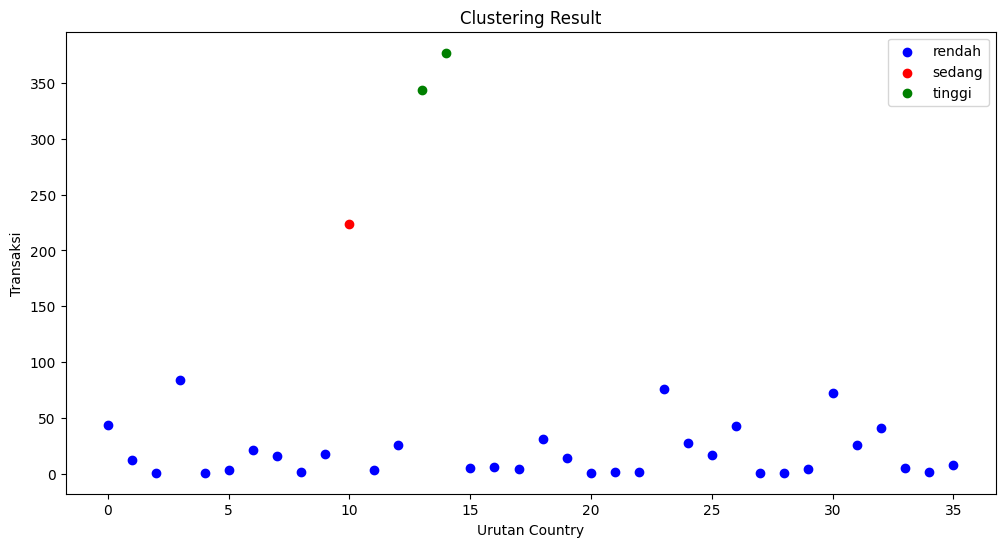

In [16]:
import matplotlib.pyplot as plt

# Membuat plot
plt.figure(figsize=(12, 6))

# Mendefinisikan warna untuk setiap cluster
colors = {'rendah': 'blue', 'tinggi': 'green', 'sedang': 'red'}

# Menggambar setiap titik data dengan warna sesuai cluster
for cluster, data in df_transaksi.groupby('Cluster'):
    plt.scatter(data.index, data['Transaksi'], color=colors[cluster], label=cluster)

# Menambahkan label sumbu dan judul
plt.xlabel('Urutan Country')
plt.ylabel('Transaksi')
plt.title('Clustering Result')
plt.legend()

# Menampilkan plot
plt.show()

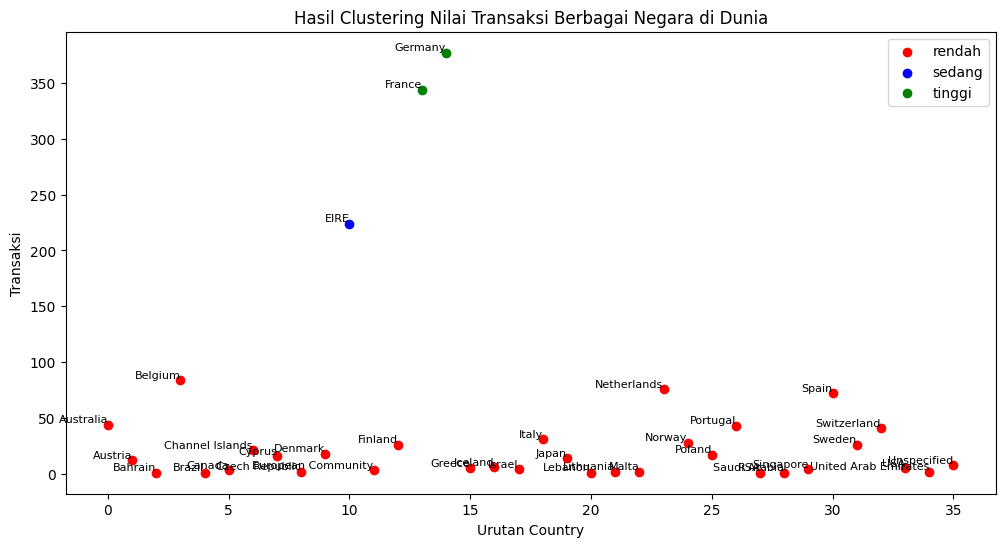

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

colors = {'rendah': 'red', 'tinggi': 'green', 'sedang': 'blue'}

for cluster, data in df_transaksi.groupby('Cluster'):
    plt.scatter(data.index, data['Transaksi'], color=colors[cluster], label=cluster)
    for i, country in enumerate(data['Country']):
        plt.text(data.index[i], data['Transaksi'].iloc[i], country, 
                 fontsize=8, ha='right', va='bottom')

plt.xlabel('Urutan Country')
plt.ylabel('Transaksi')
plt.title('Hasil Clustering Nilai Transaksi Berbagai Negara di Dunia')
plt.legend()

plt.show()